In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,StratifiedKFold,RepeatedStratifiedKFold, cross_validate
from copy import deepcopy

from time import time
from sklearn.preprocessing import FunctionTransformer

In [74]:
df = pd.read_csv('D:/Belajar python/mlc_dataslayer_revisi/train_clean.csv')
test = pd.read_csv('D:/Belajar python/mlc_dataslayer_revisi/test_clean.csv')
sampel = pd.read_csv('D:/Belajar python/mlc_dataslayer_revisi/sample_submission.csv')

In [3]:
df.head()

,Id,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,11.904762,7.200000,9.800000,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,13.793103,9.700000,11.960000,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,10.204082,7.299251,8.894238,170
3,4,CHEVO,VAN - PASSENGER,NaN,8.0,A6,X,17.300000,11.700000,14.780000,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,7.899357,8.010000,180


## Feature Engineering

In [75]:
def get_char(x):
    if pd.isnull(x):
        return x
    else:
        char =''
        for i in x:
            if i.isalpha():
                char += i
        return char

In [76]:
df['gears'] = df['Transmission'].copy()
df['gears'] = df["gears"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else "No Gears")

In [77]:
df['Transmission'] = df["Transmission"].apply(get_char)

In [107]:
def missing_values_imputation(data1):
    data = data1.copy()

    col_name = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb']
    for col in col_name:
        data[col] = data.groupby(['Make', 'Vehicle_Class', 'Transmission'])[col].transform(lambda x: x.fillna(x.mean()))
        data[col] = data.groupby(['Transmission', 'Vehicle_Class'])[col].transform(lambda x: x.fillna(x.mean()))
        data[col] = data.groupby(['Make', 'Vehicle_Class'])[col].transform(lambda x: x.fillna(x.mean()))
        data[col] = data.groupby(['Make', 'Transmission'])[col].transform(lambda x: x.fillna(x.mean()))
        data[col] = data.groupby(['Make'])[col].transform(lambda x: x.fillna(x.mean()))

    return data

In [108]:
missing_values_imputation(df).isna().sum()

Id                          0
Make                        0
Vehicle_Class            2051
Engine_Size                 0
Cylinders                   0
Transmission             1483
Fuel_Type                1942
Fuel_Consumption_City       0
Fuel_Consumption_Hwy        0
Fuel_Consumption_Comb       0
CO2_Emissions               0
gears                       0
dtype: int64

In [109]:
df2 = missing_values_imputation(df)

In [110]:
df2

,Id,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,gears
0,1,MITSU,SUV - SMALL,1.50000,4.0,AV,X,11.904762,7.200000,9.800000,208,8
1,2,TOYOTI,PICKUP TRUCK - SMALL,3.09661,6.0,A,X,13.793103,9.700000,11.960000,325,5
2,3,MATSUDA,COMPACT,2.00000,4.0,AS,X,10.204082,7.299251,8.894238,170,6
3,4,CHEVO,VAN - PASSENGER,5.63972,8.0,A,X,17.300000,11.700000,14.780000,362,6
4,5,TOYOTI,COMPACT,1.80000,4.0,M,X,8.100000,7.899357,8.010000,180,6
...,...,...,...,...,...,...,...,...,...,...,...,...
54932,54933,CHEVO,SUBCOMPACT,6.20000,8.0,AS,Z,11.900000,8.802817,10.505360,318,10
54933,54934,CHEVO,SUBCOMPACT,3.60000,6.0,M,X,21.000000,10.600000,16.323040,303,6
54934,54935,FOLD,TWO-SEATER,3.50000,6.0,AM,Z,18.200000,12.500000,15.630000,410,7
54935,54936,CHEVO,PICKUP TRUCK - STANDARD,6.20000,8.0,A,Z,18.300000,9.900000,14.520000,466,8


In [112]:
test['gears'] = test['Transmission'].copy()
test['gears'] = test["gears"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else "No Gears")
test['Transmission'] = test['Transmission'].apply(get_char)

test2 = missing_values_imputation(test)

In [114]:
df2.to_csv('D:/Belajar python/mlc_dataslayer_revisi/train_feat_eng.csv', index=False)
test2.to_csv('D:/Belajar python/mlc_dataslayer_revisi/test_feat_eng.csv', index=False)

In [115]:
import warnings
warnings.filterwarnings("ignore")


<Axes: xlabel='gears', ylabel='CO2_Emissions'>

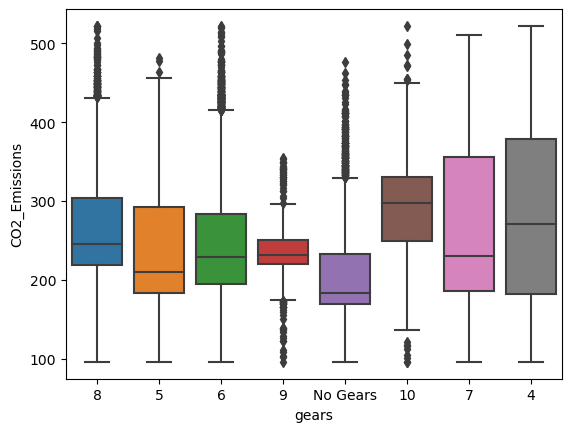

In [121]:
sns.boxplot(data=df2, x='gears', y='CO2_Emissions')

<Axes: >

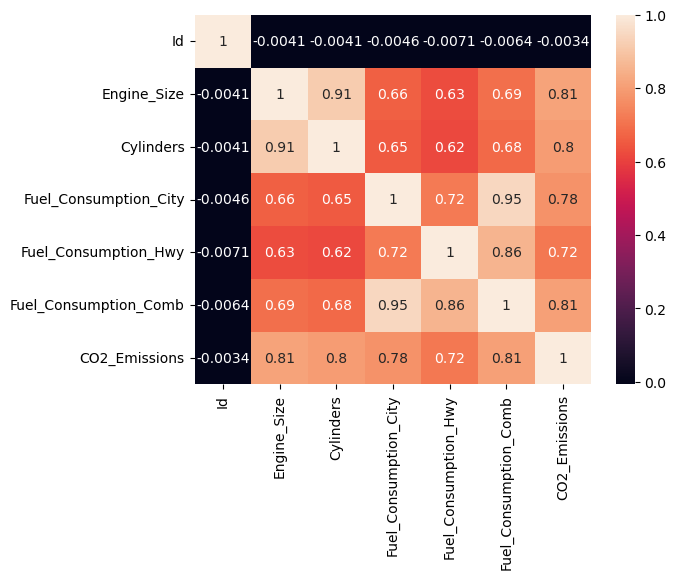

In [117]:
sns.heatmap(df2.corr(), annot=True)

<Axes: xlabel='Transmission', ylabel='CO2_Emissions'>

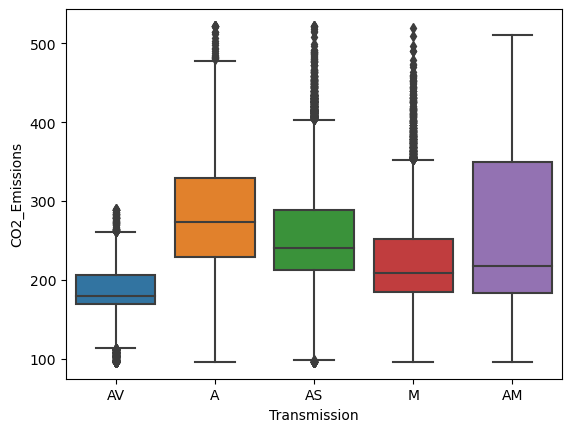

In [122]:
sns.boxplot(data=df2, x='Transmission', y='CO2_Emissions')

<Axes: xlabel='Engine_Size', ylabel='CO2_Emissions'>

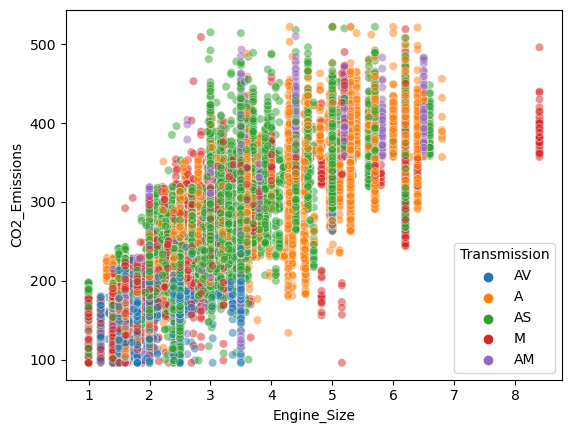

In [124]:
sns.scatterplot(data=df2, x='Engine_Size', y='CO2_Emissions',  hue='Transmission', alpha=0.5)

<Axes: xlabel='Fuel_Consumption_Comb', ylabel='CO2_Emissions'>

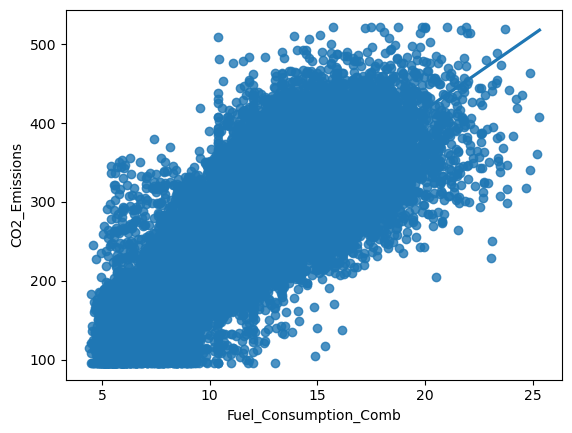

In [133]:
sns.regplot(data=df2, x='Fuel_Consumption_Comb', y='CO2_Emissions')

In [134]:
df2.isna().sum()

Id                          0
Make                        0
Vehicle_Class            2051
Engine_Size                 0
Cylinders                   0
Transmission             1483
Fuel_Type                1942
Fuel_Consumption_City       0
Fuel_Consumption_Hwy        0
Fuel_Consumption_Comb       0
CO2_Emissions               0
gears                       0
dtype: int64

In [130]:
import plotly.express as px

## code?